# Visualizing Earnings Bases on College Majors

In this project we will be visualizing earnings of college graduates across different majors. We'll be working with a dataset on the job outcomes of students who graduated from college between 2010 and 2012. The original data on job outcomes was released by American Community Survey, which conducts surveys and aggregates the data. FiveThirtyEight cleaned the dataset and released it on their Github repo.

Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more. Here are some of the columns in the dataset:

- Rank - Rank by median earnings (the dataset is ordered by this column).
- Major_code - Major code.
- Major - Major description.
- Major_category - Category of major.
- Total - Total number of people with major.
- Sample_size - Sample size (unweighted) of full-time.
- Men - Male graduates.
- Women - Female graduates.
- ShareWomen - Women as share of total.
- Employed - Number employed.
- Median - Median salary of full-time, year-round workers.
- Low_wage_jobs - Number in low-wage service jobs.
- Full_time - Number employed 35 hours or more.
- Part_time - Number employed less than 35 hours.

Here are a few questions we are hoping to answer during the course of this project:

- Do students in more popular majors make more money?
- How many majors are predominantly male? Predominantly female?
- Which category of majors have the most students?

Let's start by importing our standard libraries and the dataset 

## Introduction

In [2]:
#Importing libraries 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import arange

In [5]:
#Running Matplotlib magic to view visualizations inline
%matplotlib inline

In [6]:
# Reading the dataset
recent_grads = pd.read_csv("recent-grads.csv")

In [8]:
#Next 3 steps help get a sense of the data we are working with
recent_grads.iloc[0]

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

In [9]:
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [10]:
recent_grads.tail()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


In [14]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


## Removing Null Values

In [20]:
#Checking which row has null values - Note, this will not display all rows with null values. Only the cols that have
#null values that are in the condition. To detect cols with null values, use describe, or isna()
recent_grads[recent_grads['Total'].isnull()]

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
21,22,1104,FOOD SCIENCE,NaN,NaN,NaN,Agriculture & Natural Resources,NaN,36,3149,...,1121,1735,338,0.096931,53000,32000,70000,1183,1274,485


In [23]:
# Assigning # of rows to a variable for comparison post removing null values
raw_data_count=recent_grads.shape[0]

In [36]:
#Using isna() to check which row has null values
recent_grads.isna().sum(axis=1)[recent_grads.isna().sum(axis=1)>0]

21    4
dtype: int64

In [38]:
#Using isna() to check which columns have null values 
recent_grads.isna().sum(axis=0)

Rank                    0
Major_code              0
Major                   0
Total                   1
Men                     1
Women                   1
Major_category          0
ShareWomen              1
Sample_size             0
Employed                0
Full_time               0
Part_time               0
Full_time_year_round    0
Unemployed              0
Unemployment_rate       0
Median                  0
P25th                   0
P75th                   0
College_jobs            0
Non_college_jobs        0
Low_wage_jobs           0
dtype: int64

In [39]:
#Removing null values using dropna(). Axis is set to 0 be default ( removes null values in rows)
recent_grads.dropna(inplace=True)
cleaned_data_count=recent_grads.shape[0]
print("Original data count", raw_data_count)
print("Cleaned data count", cleaned_data_count)

Original data count 173
Cleaned data count 172


## Scatter Plots

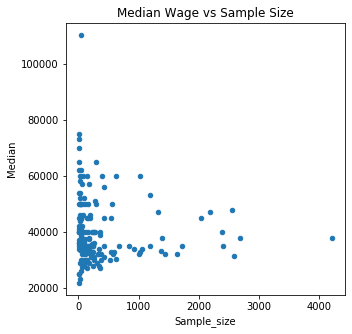

In [61]:
recent_grads.plot(x='Sample_size',y='Median',kind='scatter',title='Median Wage vs Sample Size',figsize=(5,5))

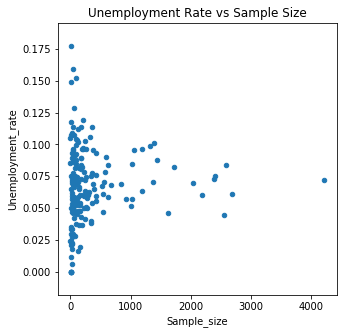

In [51]:
recent_grads.plot(x='Sample_size',y='Unemployment_rate',kind='scatter',title='Unemployment Rate vs Sample Size',figsize=(5,5))

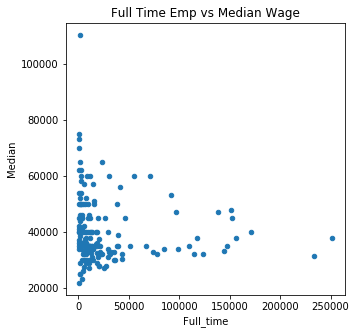

In [62]:
recent_grads.plot(x='Full_time',y='Median',kind='scatter',title='Full Time Emp vs Median Wage',figsize=(5,5))

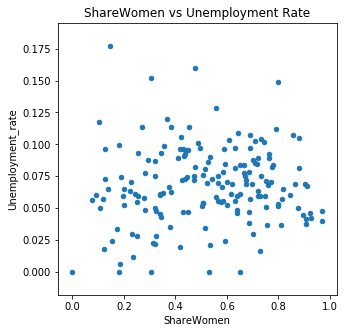

In [53]:
recent_grads.plot(x='ShareWomen',y='Unemployment_rate',kind='scatter',title='Share of Women vs Unemployment Rate',figsize=(5,5))

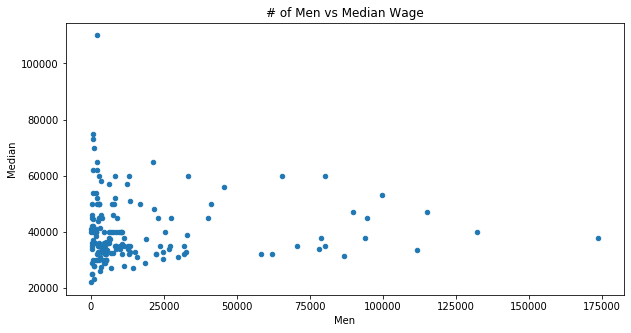

In [63]:
recent_grads.plot(x='Men',y='Median',kind='scatter',title='# of Men vs Median Wage',figsize=(10,5))

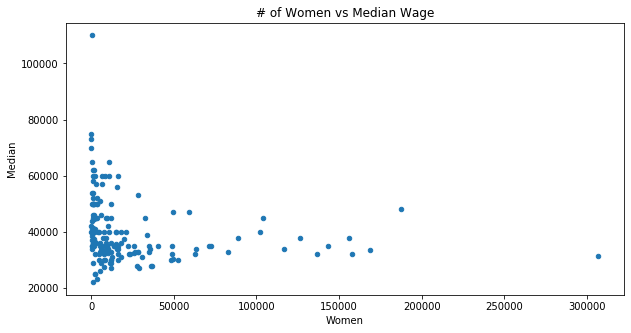

In [64]:
recent_grads.plot(x='Women',y='Median',kind='scatter',title='# of Women vs Median Wage',figsize=(10,5))

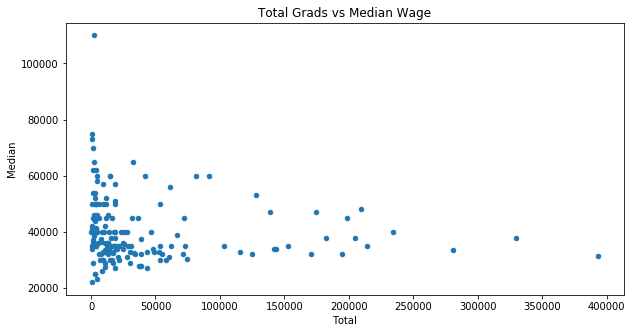

In [65]:
recent_grads.plot(x='Total',y='Median',kind='scatter',title='Total Grads vs Median Wage',figsize=(10,5))

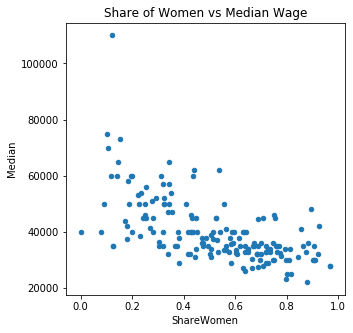

In [66]:
recent_grads.plot(x='ShareWomen',y='Median',kind='scatter',title='Share of Women vs Median Wage',figsize=(5,5))

- Do students in more popular majors make more money?
Based on the `Total Grads vs Median Wage` plot, we can see that there is really no relation between popularity of a major and the income the grads earn. We can see some popular majors (>50K students) with avg to low income. Some of the less popular majors can be seen to have grads with higher median income but the relation is not consistent across all such majors. Most of the majors appear to have lower than 50K grad with a median wage between 30K to 50K. 

- Do students that majored in subjects that were majority female make more money?
We can see from the `Share of Women vs Median Wage` plot that there is a weak negative relation between majors with a higher concentration of women and the income that students make after graduating from these majors. Some of the higher wages can be seen from students with majors with a lower ratio of female students.

- Is there any link between the number of full-time employees and median salary?
Based on the `Full Time Emp vs Median Wage` plot, we can see that there is no link between the number of full-time employees and median salary. Some majors with fewer full time employees have a higher median income but the relation is not consistent across all such majors.

## Histograms

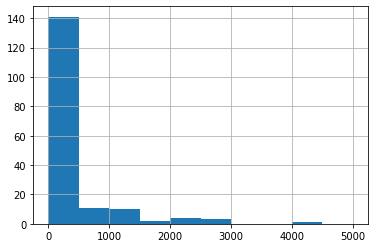

In [108]:
ax=recent_grads['Sample_size'].hist(bins=10,range=(0,5000))

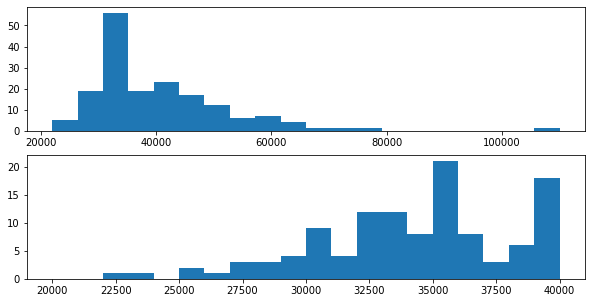

In [183]:
fig=plt.figure(figsize=(10,5))
ax1=fig.add_subplot(2,1,1)
ax2=fig.add_subplot(2,1,2)
#default histogram showing the median distribution
ax1.hist(recent_grads['Median'],bins=20)
# close-up histogram of the popular median salary range
ax2.hist(recent_grads['Median'],bins=20,range=(20000,40000))
plt.show()

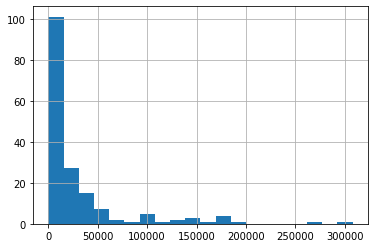

In [187]:
recent_grads['Employed'].hist(bins=20)

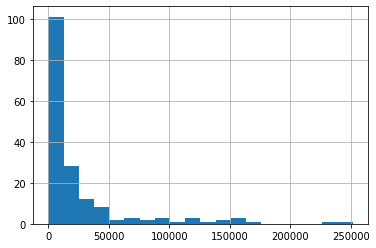

In [196]:
recent_grads['Full_time'].hist(bins=20)

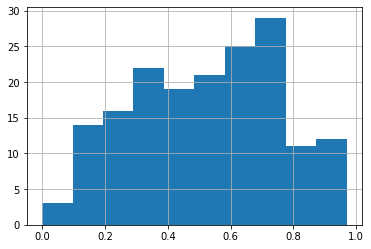

In [203]:
recent_grads['ShareWomen'].hist(bins=10)

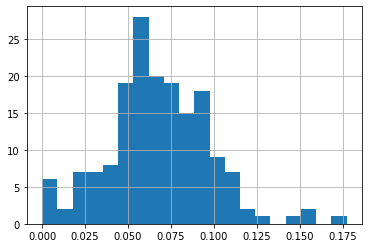

In [199]:
recent_grads['Unemployment_rate'].hist(bins=20)

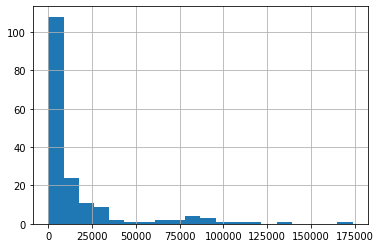

In [201]:
recent_grads['Men'].hist(bins=20)

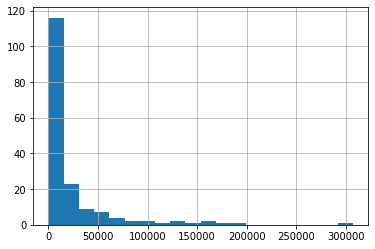

In [204]:
recent_grads['Women'].hist(bins=20)

We use some of these plots to explore and answer the following questions:

-- What percent of majors are predominantly male? Predominantly female?

We focus in just the x-values above 0.6 (60%) in the histogram from ShareWomen column, we can see how in about 77 majors more than 60 percentage of the students are women, representing the 44.76% of the total majors and the ones who present more men represent the 55.23%. We have calculated these number, taking into account the following frecuencies for each bar higher than 0.6:

bar 0.6-0.7: the frequency is about 25
bar 0.7-0.8: the frecuency is about 29
bar 0.8-0.9: the frecuency is about 11
bar 0.9-1: the frecuency is about 12
-- What's the most common median salary range?

These figures show how the most common median salary range is between 30000 and 40000.

## Scatter Matrix Plot

In [206]:
from pandas.plotting import scatter_matrix

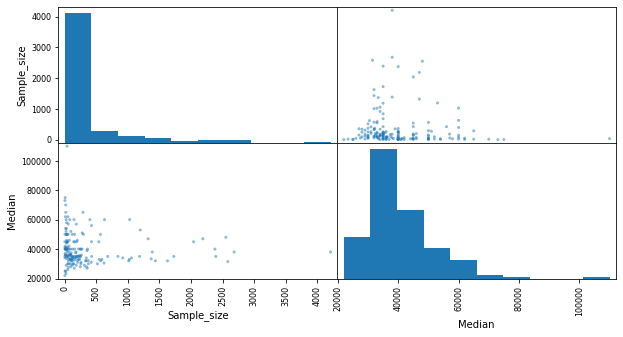

In [248]:
fig,ax=scatter_matrix(recent_grads[['Sample_size','Median']],figsize=(10,5))

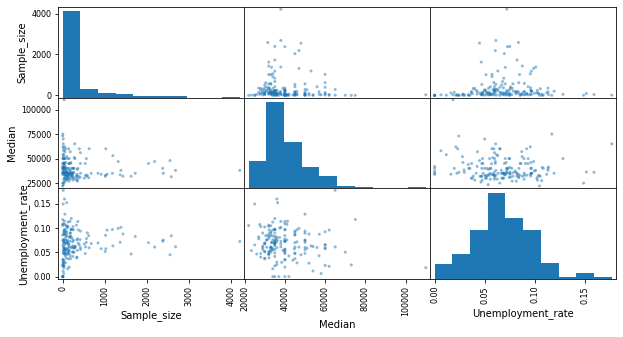

In [262]:
ax=scatter_matrix(recent_grads[['Sample_size','Median','Unemployment_rate']],figsize=(10,5))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DDFBB8F6C8>,
      dtype=object)

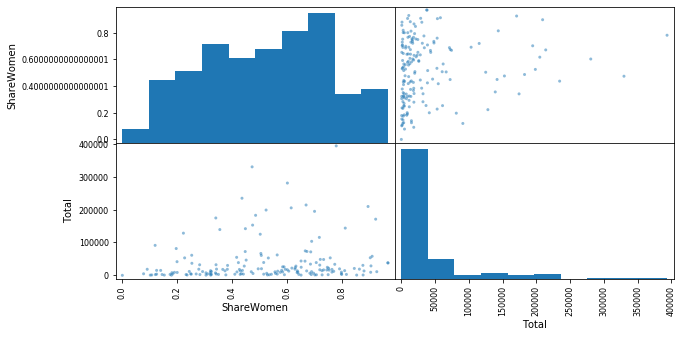

In [296]:
scatter_matrix(recent_grads[['ShareWomen','Total']],figsize=(10,5))

[Text(0, 0, 'PETROLEUM ENGINEERING'),
 Text(0, 0, 'MINING AND MINERAL ENGINEERING'),
 Text(0, 0, 'METALLURGICAL ENGINEERING'),
 Text(0, 0, 'NAVAL ARCHITECTURE AND MARINE ENGINEERING'),
 Text(0, 0, 'CHEMICAL ENGINEERING'),
 Text(0, 0, 'NUCLEAR ENGINEERING')]

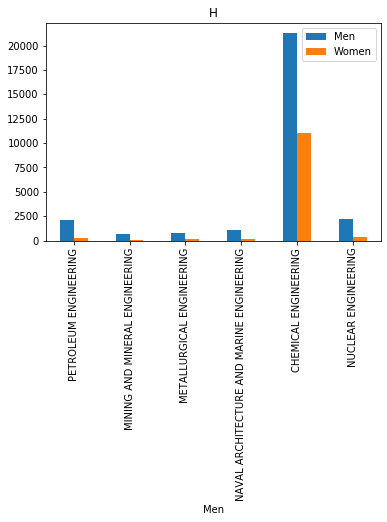

In [377]:
ax=recent_grads.loc[:5,["Major",'Men','Women']].plot(kind='bar')
ax.set_title("H")
ax.set_xlabel("Men")
ax.set_xticklabels(recent_grads['Major'])

Text(0.5, 1.0, 'L')

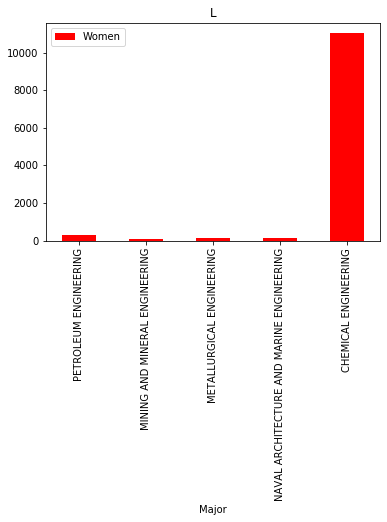

In [358]:
ax1=recent_grads[:5].plot.bar(x='Major',y='Women',width=0.5,color='red',title="H")
ax1.set_title("L")

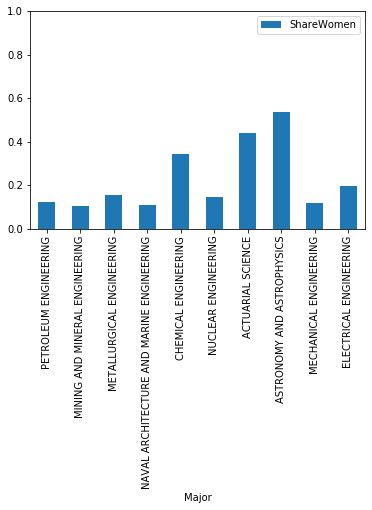

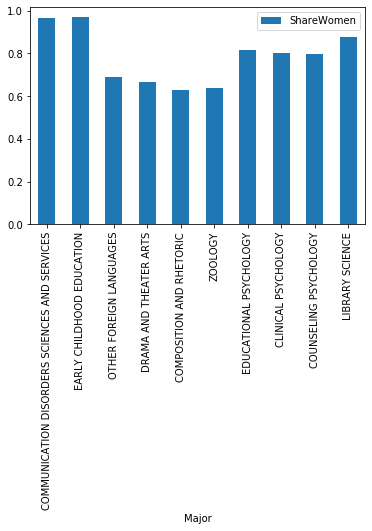

In [372]:
ax1=recent_grads[:10].plot.bar(x='Major',y='ShareWomen')
ax1.set_ylim((0,1))

ax2=recent_grads[-10:].plot.bar(x='Major',y='ShareWomen')

(0.0, 0.185)

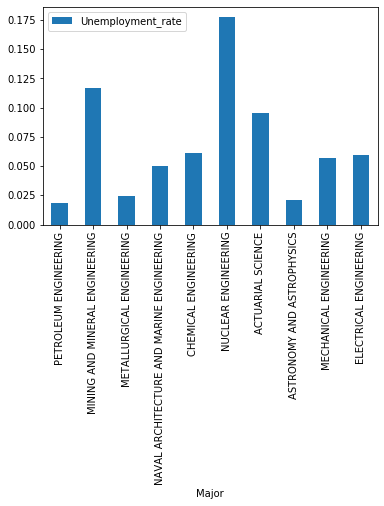

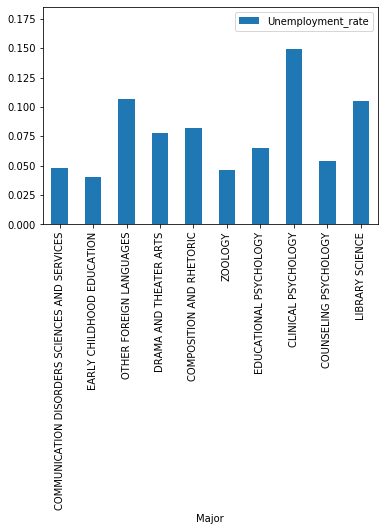

In [378]:
ax1=recent_grads[:10].plot.bar(x='Major',y='Unemployment_rate')


ax2=recent_grads[-10:].plot.bar(x='Major',y='Unemployment_rate')
ax2.set_ylim((0.000,0.185))

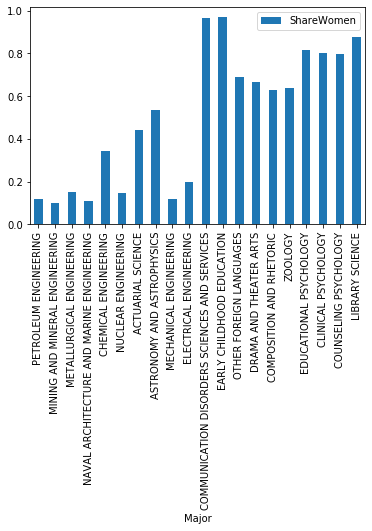

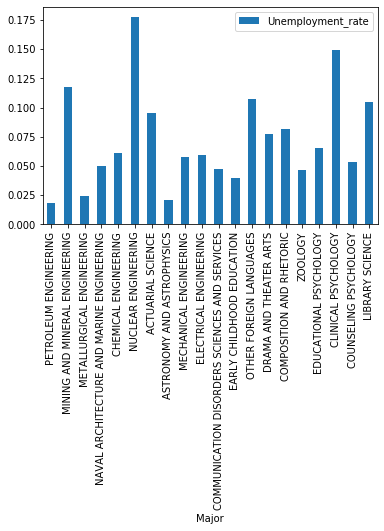

In [403]:
recent_grads[:10].append(recent_grads[-10:],ignore_index=True).plot(x='Major',y='ShareWomen',kind='bar')
recent_grads[:10].append(recent_grads[-10:],ignore_index=True).plot(x='Major',y='Unemployment_rate',kind='bar')
